**Novita Purwoningtyas**

**Data Science Batch 08**

#Informasi data

Telco customer churn berisi informasi tentang perusahaan telekomunikasi fiktif yang menyediakan layanan telepon rumah dan Internet kepada 7043 pelanggan. Adapun deskripsi dari masing - masing kolom adalah : 


1. **Customer ID** = Nomer ID customer.
2. **Gender** = Gender customer.
3. **SeniorCitizen** = Menunjukan cutomer tersebut senior (sudah tua) atau belum.
4. **Partner** = Menunjukan customer tersebut punya partner atau tidak.
5. **Dependents** = Menunjukan apakah customer tersebut punya tanggungan(anak/ortu/dll) atau tidak.
6. **Tenure** = Menunjukan berapa lama customer tersebut bertahan pada perusahaan.
7. **PhoneService** = Menunjukkan jika customer berlangganan layanan telepon rumah dengan perusahaan.
8. **MultipleLines** = Menunjukkan jika customer berlangganan beberapa saluran telepon dengan perusahaan.
9. **InternetService** = Menunjukkan jika customer berlangganan layanan Internet dengan perusahaan.
10. **OnlineSecurity** = Menunjukkan jika customer berlangganan layanan keamanan online tambahan yang disediakan oleh perusahaan.
11. **OnlineBackup** = Menunjukkan jika customer berlangganan layanan pencadangan (backup) online tambahan yang disediakan oleh perusahaan.
12. **DeviceProtection** = Menunjukkan jika customer berlangganan paket perlindungan perangkat tambahan untuk peralatan Internet mereka yang disediakan oleh perusahaan.
13. **TechSupport** = Menunjukkan jika customer berlangganan paket dukungan teknis tambahan dari perusahaan. 
14. **StreamingTV** = Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming program televisi.
15. **StreamingMovies** = Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk streaming film.
16. **Contract** = Menunjukkan jenis kontrak pelanggan saat ini: Bulan-ke-Bulan, Satu Tahun, Dua Tahun.
17. **PaperlessBilling** = Menunjukkan jika pelanggan telah memilih penagihan tanpa kertas.
18. **PaymentMethod** = Menunjukkan bagaimana pelanggan membayar tagihan mereka.
19. **MonthlyCharges** = Menunjukkan total biaya bulanan pelanggan saat ini untuk semua layanan mereka dari perusahaan.
20. **TotalCharges** = Menunjukkan total biaya customer.
21. **Chrun** = Menunjukan apakah pelanggan tersebut pindah atau tidak(pelanggan yang pergi dalam sebulan terakhir).


#Import library dan data

In [1]:
#Mengimport library yang digunakan
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3378,5766-FTRTS,Male,0,Yes,No,72,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,84.45,6033.1,No
4557,5944-UGLLK,Male,0,No,No,53,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),54.90,3045.75,No
5225,5376-PCKNB,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.45,7459,No
4089,4282-YMKNA,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.75,706.6,Yes
4306,2931-SVLTV,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),110.10,4469.1,No


#Missing Value

Mengecek missing value perlu di lakukan agar dapat memastikan apakah dalam suatu data set ada data yang missing atau mungkin ada data yang aneh/berbeda dengan data - data lainya. Karna jika ada missing value maka model Machine Learning tidak akan berjalan dengan benar(Error).

In [3]:
#melihat data type dan missing value pada data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari hasil output diatas dapat dilihat bahwa tidak ada missing value dalam data set tersebut.

In [4]:
#Mengecek apakah ada data yang aneh/berbeda pada keseluruhan data set
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= customerID =================


5324-KTGCG    1
1269-FOYWN    1
6734-FQAJX    1
8993-PHFWD    1
9281-PKKZE    1
             ..
0895-LMRSF    1
0322-YINQP    1
0702-PGIBZ    1
8046-DNVTL    1
7860-UXCRM    1
Name: customerID, Length: 7043, dtype: int64


============= gender =================


Male      3555
Female    3488
Name: gender, dtype: int64


============= SeniorCitizen =================


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


============= Partner =================


No     3641
Yes    3402
Name: Partner, dtype: int64


============= Dependents =================


No     4933
Yes    2110
Name: Dependents, dtype: int64


============= tenure =================


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


============= PhoneService =================


Yes    6361
No      682
Name: PhoneService, dtype: int64


============= MultipleLines =================


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


============= InternetService =================


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


============= OnlineSecurity =================


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


============= OnlineBackup =================


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


============= DeviceProtection =================


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


============= TechSupport =================


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


============= StreamingTV =================


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


============= StreamingMovies =================


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


============= Contract =================


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


============= MonthlyCharges =================


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64


============= TotalCharges =================


20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
692.55      1
815.5       1
914.6       1
7412.25     1
1363.25     1
Name: TotalCharges, Length: 6531, dtype: int64


============= Churn =================


No     5174
Yes    1869
Name: Churn, dtype: int64

Pada hasil output diatas dapat dilihat bahwa ada data yang kosong pada kolom data TotalCharges. Data yang kosong tersebut isinya adalah string kosong berjumlah 11. 

In [5]:
#Mengecek berapa persen data string kosong pada kolom TotalCharges
100 * len(data[data['TotalCharges']==' ']) / len(data)

0.15618344455487718

Ada 0.15% data yang kosong. Saya akan mengisi kolom yang berisi string kosong dengan nilai mean. 

In [6]:
#Cek type data pada kolom TotalCharges
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Karna type datanya object maka diubah dulu menjadi float.

In [7]:
#Mengubah type datanya
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [8]:
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
#Mengisi data string kosong dengan nilai mean
avg_TotalCharges = data[data['TotalCharges']!=' ']['TotalCharges'].mean()

data['TotalCharges'] = data['TotalCharges'].apply(lambda x: avg_TotalCharges if x==' ' else x)

In [10]:
100 * len(data[data['TotalCharges']==' ']) / len(data)

0.0

Sekarang sudah tidak ada lagi data string kosong pada kolom TotalCharges.

#Duplicate

Tujuan dilakukan cek duplikat adalah mengecek apakah dalam suatu data set ada data yang duplikat atau tidak. 

In [11]:
#cek apakah ada data yang duplikat pada data set
len(data.drop_duplicates()) / len(data)

1.0

Dari hasil output diatas menunjukan angka 1 yang artinya tidak ada data duplikat pada data set tersebut. 

#Outlier

Outlier handling diperlukan untuk mengecek jika terdapat data yang ekstrim dalam suatu data set. Biasanya di cek dengan menggunakan box plot. Data yang bisa di cek menggunakan Box Plot hanya data yang bertipe numeric(angka).

Saat di cek tipe datanya terdapat 4 kolom yang datanya terdiri dari angka(float,int). Yaitu kolom tenure, MonthlyCharges, Gender, dan TotalCharges. Tetapi kita tidak udah mengecek gender karna datanya hanya terdiri dari 2 angka (0 dan 1).

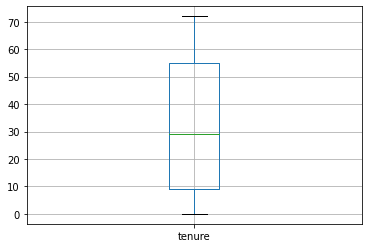

In [12]:
#Mengecek apakah ada nilai outlier pada kolom 'tenure'
data[['tenure']].boxplot()

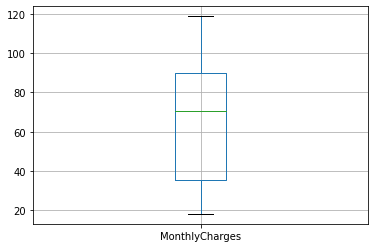

In [13]:
#Mengecek apakah ada nilai outlier pada kolom data 'MonthlyCharges'
data[['MonthlyCharges']].boxplot()

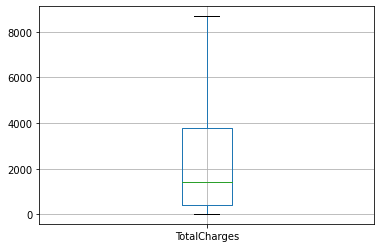

In [14]:
data[['TotalCharges']].boxplot()

Setelah di cek menggunakan Boxplot tidak terdapat outlier pada kolom data tenure, MonthlyCharges, dan TotalCharges. 

#Categorical Data Encoding

Pada saat ingin membuat model ML, komputer hanya dapat memproses data yang berupa angka. Maka dari itu kita perlu mengubah data yang tipenya Object(str) menjadi data numerik(angka).

Saya akan menggunakan Label Encoding untuk mengubah data menjadi data numerik agar datanya berubah menjadi numerik tetapi kolomnya tidak bertambah 

In [15]:
#mengubah data gender menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender'])
 
data['gender'].unique()

array([0, 1])

In [16]:
#mengubah data SeniorCitizen menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['SeniorCitizen']= label_encoder.fit_transform(data['SeniorCitizen'])
 
data['SeniorCitizen'].unique()

array([0, 1])

In [17]:
#mengubah data Partner menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['Partner']= label_encoder.fit_transform(data['Partner'])
 
data['Partner'].unique()

array([1, 0])

In [18]:
#mengubah data Dependents menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
 
data['Dependents'].unique()

array([0, 1])

In [19]:
#mengubah data PhoneService menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['PhoneService']= label_encoder.fit_transform(data['PhoneService'])
 
data['PhoneService'].unique()

array([0, 1])

In [20]:
#mengubah data MultipleLines menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['MultipleLines']= label_encoder.fit_transform(data['MultipleLines'])
 
data['MultipleLines'].unique()

array([1, 0, 2])

In [21]:
#mengubah data InternetService menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['InternetService']= label_encoder.fit_transform(data['InternetService'])
 
data['InternetService'].unique()

array([0, 1, 2])

In [22]:
#mengubah data OnlineSecurity menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['OnlineSecurity']= label_encoder.fit_transform(data['OnlineSecurity'])
 
data['OnlineSecurity'].unique()

array([0, 2, 1])

In [23]:
#mengubah data OnlineBackup menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['OnlineBackup']= label_encoder.fit_transform(data['OnlineBackup'])
 
data['OnlineBackup'].unique()

array([2, 0, 1])

In [24]:
#mengubah data DeviceProtection menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['DeviceProtection']= label_encoder.fit_transform(data['DeviceProtection'])
 
data['DeviceProtection'].unique()

array([0, 2, 1])

In [25]:
#mengubah data TechSupport menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['TechSupport']= label_encoder.fit_transform(data['TechSupport'])
 
data['TechSupport'].unique()

array([0, 2, 1])

In [26]:
#mengubah data StreamingTV menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['StreamingTV']= label_encoder.fit_transform(data['StreamingTV'])
 
data['StreamingTV'].unique()

array([0, 2, 1])

In [27]:
#mengubah data StreamingMovies menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['StreamingMovies']= label_encoder.fit_transform(data['StreamingMovies'])
 
data['StreamingMovies'].unique()

array([0, 2, 1])

In [28]:
#mengubah data StreamingMovies menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['Contract']= label_encoder.fit_transform(data['Contract'])
 
data['Contract'].unique()

array([0, 1, 2])

In [29]:
#mengubah data PaperlessBilling menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['PaperlessBilling']= label_encoder.fit_transform(data['PaperlessBilling'])
 
data['PaperlessBilling'].unique()

array([1, 0])

In [30]:
#mengubah data PaperlessBilling menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['PaymentMethod']= label_encoder.fit_transform(data['PaymentMethod'])
 
data['PaymentMethod'].unique()

array([2, 3, 0, 1])

In [31]:
#mengubah data PaperlessBilling menjadi numeric
label_encoder = preprocessing.LabelEncoder()
data['Churn']= label_encoder.fit_transform(data['Churn'])
 
data['Churn'].unique()

array([0, 1])

#Scaling

Scaling data di perlukan karna data dengan skala yang sama dan centered akan mempercepat algoritma pembelajaran. 

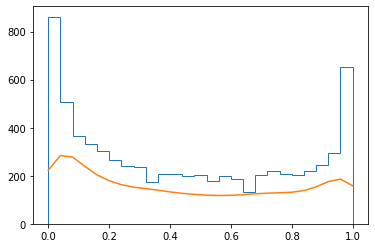

In [37]:
#cek sebaran data tenure normal atau tidak 
tenure = data['tenure']
density = stats.gaussian_kde(tenure)
n, x, _ = plt.hist(tenure, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.show()

Karna sebaran datanya tidak normal, maka kita melakukan min-max normalisasi pada data tersebut. 

In [38]:
def min_max(series_col):
    return (series_col - series_col.min()) / (series_col.max()-series_col.min())

data['tenure'] = min_max(data['tenure'])

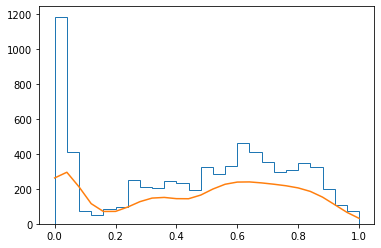

In [39]:
#cek sebaran data Monthlycharges normal atau tidak 
MonthlyCharges = data['MonthlyCharges']
density = stats.gaussian_kde(MonthlyCharges)
n, x, _ = plt.hist(MonthlyCharges, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.show()

Karna sebaran datanya tidak normal, maka kita melakukan min-max normalisasi pada data tersebut.

In [40]:
def min_max(series_col):
    return (series_col - series_col.min()) / (series_col.max()-series_col.min())

data['MonthlyCharges'] = min_max(data['MonthlyCharges'])

In [41]:
def min_max(series_col):
    return (series_col - series_col.min()) / (series_col.max()-series_col.min())

data['TotalCharges'] = min_max(data['TotalCharges'])

#Drop

Menghapus kolom customerID karna kolom tersebut tidak terlalu pengaruh pada data customer churn. 

In [42]:
data.drop('customerID', inplace=True, axis=1)

#Final clean data

In [43]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1
